<a href="https://colab.research.google.com/github/Tanishq-Btech/PRODIGY_WD_1/blob/main/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd           #importing necessory libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/loan_data_set.csv')           #loading the dataset
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.size                 #total size of dataset

7982

In [ ]:
df.shape             #total rows and columns

(614, 13)

In [ ]:
df.info()               #checking datatypes and nullcount for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()           #for getting statistical summary of that dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.drop(['Loan_ID'],axis=1,inplace=True)             #droping loanid column because it both contains numerical and character values

In [ ]:
df['Dependents'] = df['Dependents'].replace('3+', 3)             #replacing distinct values so that all values should be same

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['Gender']=le.fit_transform(df['Gender'])                 #doing labelencoding means converting categorical values to numerical values
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
df.isnull().sum()          #chechking null or missing values in each columnns

,0
Gender,0
Married,0
Dependents,15
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [ ]:
df['Dependents']=df['Dependents'].replace('3+', 3)                          #handling missing values using fillna method
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
q1=df['ApplicantIncome'].quantile(0.25)         #detecting outliers in the dataset
q3=df['ApplicantIncome'].quantile(0.75)
iqr=q3-q1
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)
df=df[(df['ApplicantIncome']>min_range) & (df['ApplicantIncome']<max_range)]

In [ ]:
min_range

np.float64(0.0)

In [ ]:
max_range

np.float64(2251.5)

In [ ]:
min_range=df["CoapplicantIncome"].mean()-3*df["CoapplicantIncome"].std()                #calculating z_scores to maintain data at same level
max_range=df["CoapplicantIncome"].mean()+3*df["CoapplicantIncome"].std()
z_scores = np.abs((df["CoapplicantIncome"] - df["CoapplicantIncome"].mean()) / df["CoapplicantIncome"].std())
df = df[(z_scores < 3)]
z_scores

,CoapplicantIncome
0,0.906551
1,0.003549
2,0.906551
3,0.516536
4,0.906551
...,...
609,0.906551
610,0.906551
611,0.761707
612,0.906551


In [ ]:
z_scores = np.abs((df["LoanAmount"] - df["LoanAmount"].mean()) / df["LoanAmount"].std())
df = df[(z_scores < 3)]
z_scores

,LoanAmount
0,0.385632
1,0.003486
2,1.283332
3,0.162555
4,0.273302
...,...
609,1.179556
610,1.822965
611,2.597876
612,1.228038


In [ ]:
z_scores = np.abs((df["Loan_Amount_Term"] - df["Loan_Amount_Term"].mean()) / df["Loan_Amount_Term"].std())
df = df[(z_scores < 3)]
z_scores

,Loan_Amount_Term
0,0.263723
1,0.263723
2,0.263723
3,0.263723
4,0.263723
...,...
609,0.263723
610,2.501630
611,0.263723
612,0.263723


In [ ]:
z_scores = np.abs((df["Credit_History"] - df["Credit_History"].mean()) / df["Credit_History"].std())
df = df[(z_scores < 3)]
z_scores

,Credit_History
0,0.463441
1,0.463441
2,0.463441
3,0.463441
4,0.463441
...,...
609,0.463441
610,0.463441
611,0.463441
612,0.463441


In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [ ]:
df.shape

(564, 12)

<Axes: >

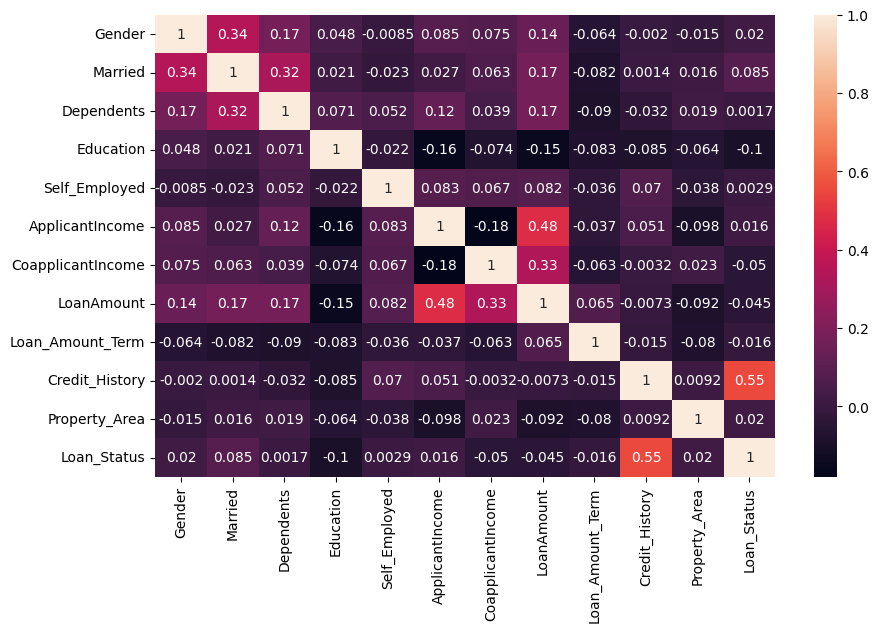

In [ ]:
plt.figure(figsize=(10,6))                  #correlation matrix
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='ApplicantIncome'>

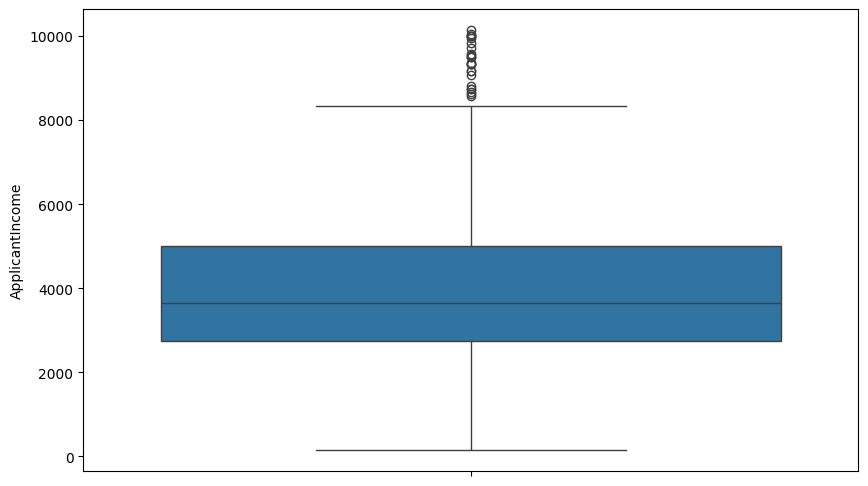

In [ ]:
plt.figure(figsize=(10,6))              #plot for checking outliers
sns.boxplot(df['ApplicantIncome'])

/tmp/ipython-input-3085224053.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

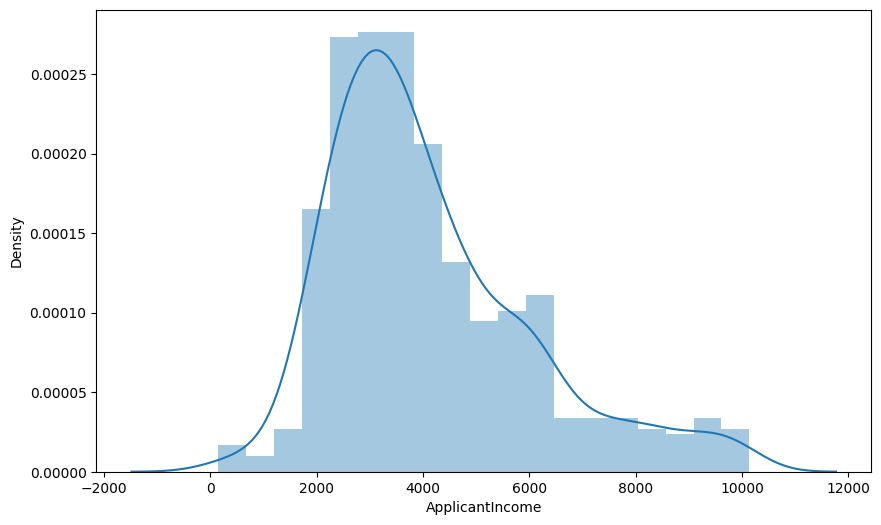

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['ApplicantIncome'])

/tmp/ipython-input-3038926500.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

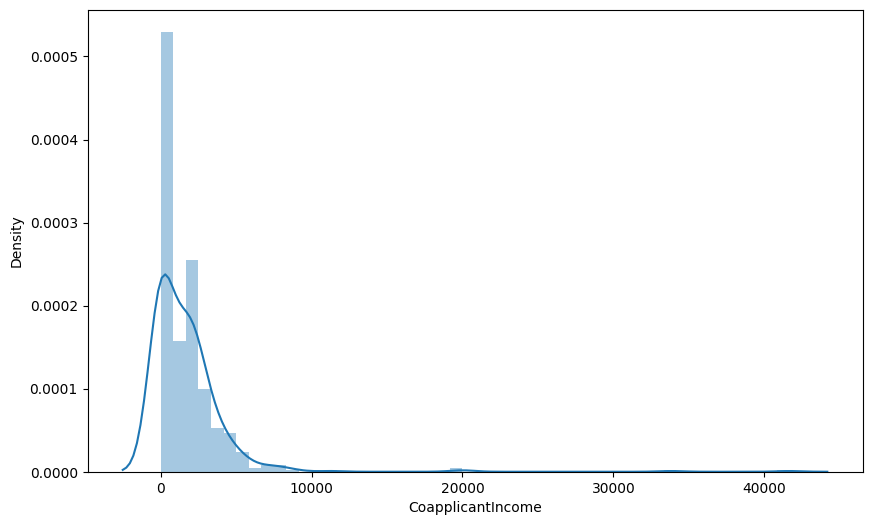

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['CoapplicantIncome'])

/tmp/ipython-input-2387250428.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

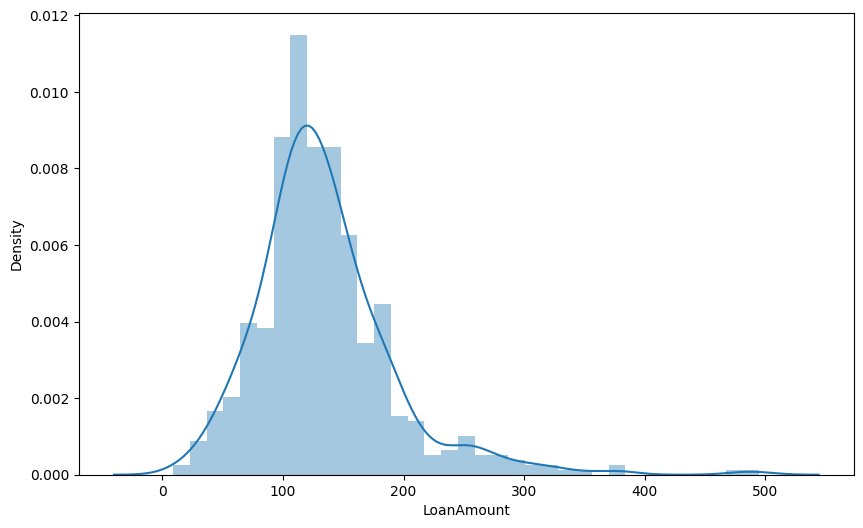

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['LoanAmount'])

/tmp/ipython-input-2660120672.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

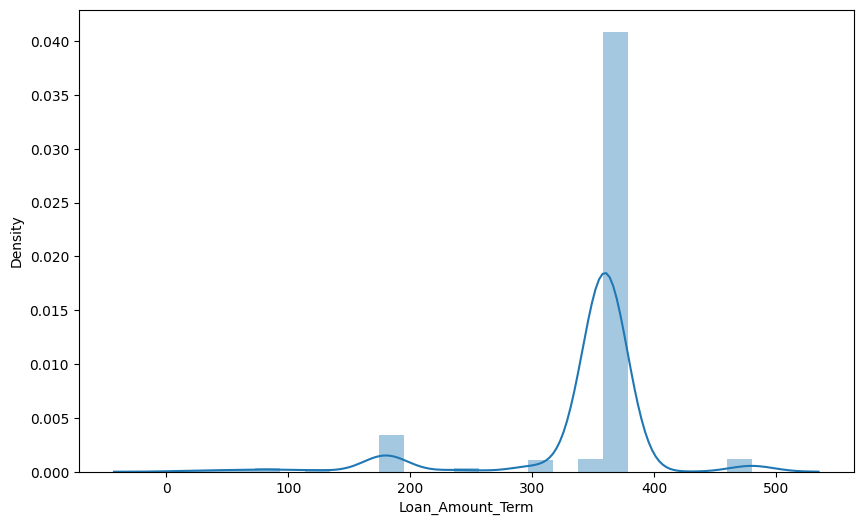

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['Loan_Amount_Term'])

/tmp/ipython-input-2459908258.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_History'])


<Axes: xlabel='Credit_History', ylabel='Density'>

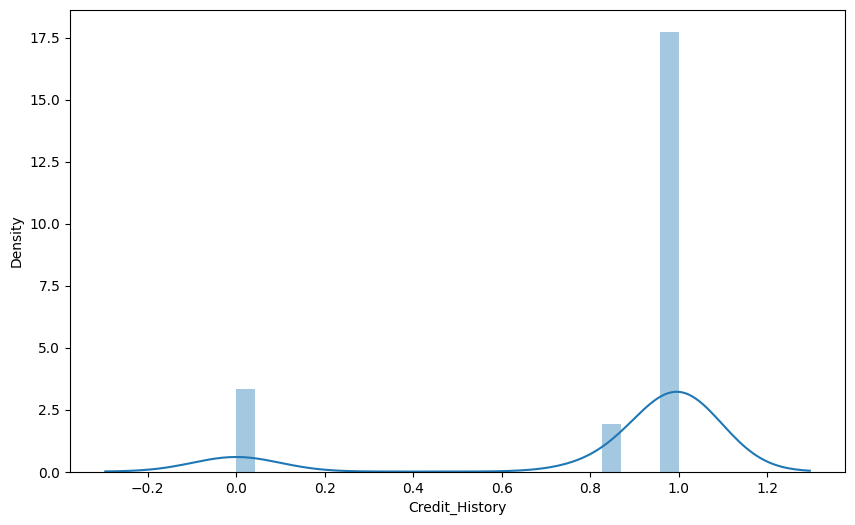

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['Credit_History'])

/tmp/ipython-input-41323901.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Dependents'])


<Axes: xlabel='Dependents', ylabel='Density'>

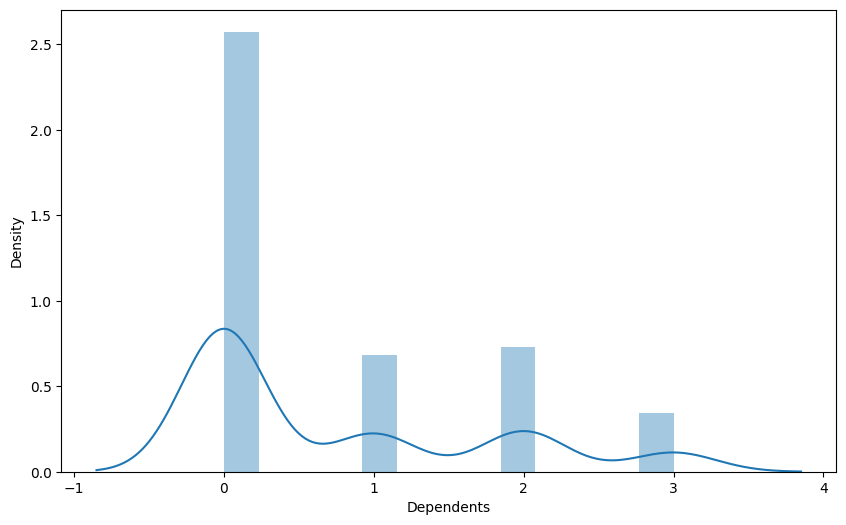

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['Dependents'])